In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import math
import os
import gc
import time
start_time = time.time()

### Root Mean Squared Logarithmic Error

Refer to [Evaluation](https://www.kaggle.com/wiki/RootMeanSquaredLogarithmicError)

In [2]:
def rmsle(y, y_pred):
    import math
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 \
              for i, pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5
#Source: https://www.kaggle.com/marknagelberg/rmsle-function

In [3]:
#LOAD DATA
print("Loading data...")
train = pd.read_table("../input/train.tsv")
test = pd.read_table("../input/test.tsv")
print(train.shape)
print(test.shape)

Loading data...
(1482535, 8)
(693359, 7)


In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


`np.log1p(x) : np.log(x+1)`

In [5]:
train['target'] = np.log1p(train['price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187D7FE35C0>]], dtype=object)

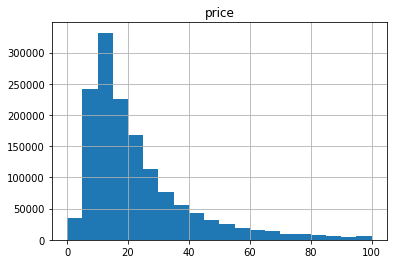

In [6]:
pd.DataFrame(train.price).hist(range=[0,100], bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187A2486F98>]], dtype=object)

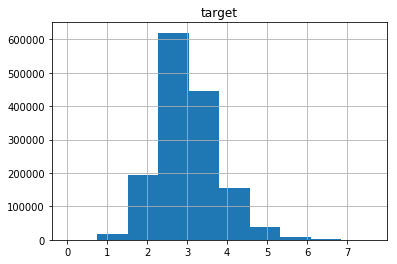

In [7]:
pd.DataFrame(train.target).hist()

In [18]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,target
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,-0.433771
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,0.654705
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,-0.433771
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,0.214131
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,0.447376


# Text preprocessing
### replace contractions

In [8]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

Check how many contractions for each case

In [112]:
for contraction in contractions:
    print(contraction,"-", (train.name.str.contains(contraction)).sum())

we'd - 0
he'd've - 0
who's - 3
couldn't've - 0
aren't - 3
shan't - 0
might've - 0
how'd - 0
who'll - 0
where'd - 0
hadn't've - 0
what's - 5
we're - 2
we'll - 0
he'll - 4
there'd - 0
he's - 50
they'd - 0
let's - 29
we've - 0
can't - 42
they've - 0
mightn't - 0
i'd - 2
wasn't - 1
i've - 0
i'm - 2
couldn't - 0
sha'n't - 0
that'd - 0
won't - 5
haven't - 0
what've - 0
i'll - 1
that's - 9
where's - 3
needn't - 0
didn't - 1
oughtn't - 0
how'll - 0
she'll - 1
they're - 80
it'll - 0
it's - 90
should've - 0
you'd - 0
isn't - 2
ain't - 8
weren't - 0
he'd - 0
it'd - 0
she's - 8
mayn't - 0
hasn't - 0
you're - 12
wouldn't - 0
how's - 0
there's - 2
shouldn't - 0
what'll - 0
could've - 0
can't've - 0
don't - 208
they'll - 0
what're - 0
must've - 0
hadn't - 0
'cause - 0
mustn't - 0
you'll - 1
she'd - 0
doesn't - 13
ma'am - 0


In [50]:
for contraction in contractions:
    print(contraction,"-", (train.item_description.str.contains(contraction)).sum())

we'd - 10
he'd've - 0
who's - 127
couldn't've - 0
aren't - 1643
shan't - 0
might've - 11
how'd - 0
who'll - 6
where'd - 1
hadn't've - 0
what's - 614
we're - 370
we'll - 327
he'll - 86
there'd - 0
he's - 804
they'd - 126
let's - 303
we've - 53
can't - 6136
they've - 484
mightn't - 0
i'd - 61
wasn't - 1477
i've - 189
i'm - 586
couldn't - 1015
sha'n't - 0
that'd - 1
won't - 4867
haven't - 2587
what've - 0
i'll - 159
that's - 4806
where's - 11
needn't - 29
didn't - 7694
oughtn't - 0
how'll - 0
she'll - 41
they're - 3744
it'll - 544
it's - 26444
should've - 27
you'd - 3408
isn't - 2371
ain't - 40
weren't - 313
he'd - 14
it'd - 74
she's - 314
mayn't - 0
hasn't - 576
you're - 5472
wouldn't - 784
how's - 5
there's - 2289
shouldn't - 125
what'll - 0
could've - 15
can't've - 0
don't - 32645
they'll - 195
what're - 1
must've - 10
hadn't - 19
'cause - 5
mustn't - 0
you'll - 2651
she'd - 5
doesn't - 8520
ma'am - 1


In [9]:
for contraction in contractions:
    train['item_description'] = train['item_description'].str.replace(contraction, contractions[contraction])
    test['item_description'] = test['item_description'].str.replace(contraction, contractions[contraction])
    train['name'] = train['name'].str.replace(contraction, contractions[contraction])
    test['name'] = test['name'].str.replace(contraction, contractions[contraction])

### 5 folds for test data

In [10]:
print('5 folds scaling the test_df')
test_len = test.shape[0]
def simulate_test(test):
    if test.shape[0] < 800000:
        indices = np.random.choice(test.index.values, 2800000)
        test_ = pd.concat([test, test.iloc[indices]], axis=0)
        return test_.copy()
    else:
        return test
test = simulate_test(test)
print('new shape ', test.shape)
print('[{}] Finished scaling test set...'.format(time.time() - start_time))

5 folds scaling the test_df
new shape  (3493359, 7)
[364.0081784725189] Finished scaling test set...


## Handle missing values
Check which columns has missing values

In [11]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
target               False
dtype: bool

In [ ]:
train.isnull().sum()

In [12]:
#HANDLE MISSING VALUES
print("Handling missing values...")
def handle_missing(dataset):
    dataset.category_name.fillna(value="missing", inplace=True)
    dataset.brand_name.fillna(value="missing", inplace=True)
    dataset.item_description.fillna(value="missing", inplace=True)
    return (dataset)

train = handle_missing(train)
test = handle_missing(test)
print(train.shape)
print(test.shape)

Handling missing values...
(1482535, 9)
(3493359, 7)


In [13]:
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,target
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895


## Create categorical columns from label columns 
Those two columns
- category_name --> category
- brand_name --> brand

In [14]:
#PROCESS CATEGORICAL DATA
print("Handling categorical variables...")
le = LabelEncoder()

le.fit(np.hstack([train.category_name, test.category_name]))
train['category'] = le.transform(train.category_name)
test['category'] = le.transform(test.category_name)

le.fit(np.hstack([train.brand_name, test.brand_name]))
train['brand'] = le.transform(train.brand_name)
test['brand'] = le.transform(test.brand_name)
del le, train['brand_name'], test['brand_name']

train.head(3)


Handling categorical variables...


,train_id,name,item_condition_id,category_name,price,shipping,item_description,target,category,brand
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,10.0,1,No description yet,2.397895,829,5265
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,52.0,0,This keyboard is in great condition and works ...,3.970292,86,3889
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,1277,4588


In [15]:
#PROCESS TEXT: RAW
print("Text to seq process...")
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train.category_name.str.lower(), 
                      train.item_description.str.lower(), 
                      train.name.str.lower()])

Text to seq process...


Using TensorFlow backend.


## Tokenize
Three more columns created
- **category_name --> seq_category_name**
- item_description --> seq_item_description
- name --> seq_name

In [16]:
# Tokenize
print("Tokenizing!")
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
print("   Transforming text to seq...")
train["seq_category_name"] = tok_raw.texts_to_sequences(train.category_name.str.lower())
test["seq_category_name"] = tok_raw.texts_to_sequences(test.category_name.str.lower())
train["seq_item_description"] = tok_raw.texts_to_sequences(train.item_description.str.lower())
test["seq_item_description"] = tok_raw.texts_to_sequences(test.item_description.str.lower())
train["seq_name"] = tok_raw.texts_to_sequences(train.name.str.lower())
test["seq_name"] = tok_raw.texts_to_sequences(test.name.str.lower())
train.head(3)

Tokenizing!
   Transforming text to seq...


,train_id,name,item_condition_id,category_name,price,shipping,item_description,target,category,brand,seq_category_name,seq_item_description,seq_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,10.0,1,No description yet,2.397895,829,5265,"[77, 43, 71, 73]","[13, 88, 103]","[2479, 8901, 6981, 71, 100, 7, 197]"
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,52.0,0,This keyboard is in great condition and works ...,3.970292,86,3889,"[62, 922, 829, 3269, 1376]","[34, 2740, 11, 8, 51, 20, 1, 256, 65, 19, 1214...","[10835, 25622, 16427, 2740]"
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,1277,4588,"[2, 43, 75, 277]","[703, 74, 10, 5, 5454, 12, 242, 1, 5, 993, 139...","[7718, 10632, 277]"


### split train test datasets

In [17]:
#EXTRACT DEVELOPTMENT TEST
dtrain, dvalid = train_test_split(train, random_state=233, train_size=0.99)
print(dtrain.shape)
print(dvalid.shape)

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(1467709, 13)
(14826, 13)


### Calculate the max sequences lengths for two columns
- seq_name
- seq_item_description

In [18]:
#SEQUENCES VARIABLES ANALYSIS
max_name_seq = np.max([np.max(train.seq_name.apply(lambda x: len(x))), np.max(test.seq_name.apply(lambda x: len(x)))])
max_seq_item_description = np.max([np.max(train.seq_item_description.apply(lambda x: len(x)))
                                   , np.max(test.seq_item_description.apply(lambda x: len(x)))])
print("max name seq "+str(max_name_seq))
print("max item desc seq "+str(max_seq_item_description))

max name seq 17
max item desc seq 269


Visualize the sequence lengths distributation

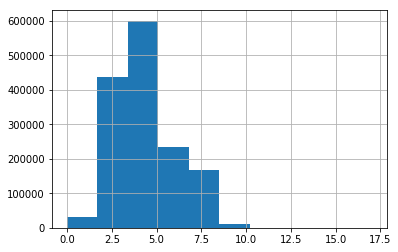

In [19]:
train.seq_name.apply(lambda x: len(x)).hist()

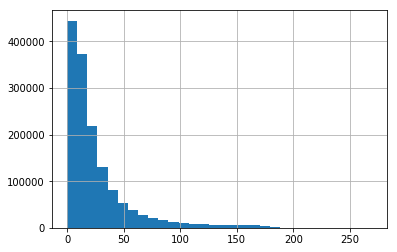

In [20]:
train.seq_item_description.apply(lambda x: len(x)).hist(bins=30)

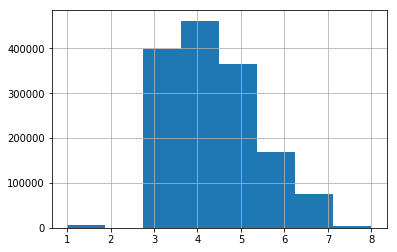

In [21]:
train.seq_category_name.apply(lambda x: len(x)).hist(bins=8)

Set max sequence lengths for sequence columns(name and description)

Calculate max categories counts for categorical columns(category, brand, condition), needed for Keras `Embedding` layer to set the max vocab length.

In [23]:
#EMBEDDINGS MAX VALUE
#Base on the histograms, we select the next lengths
MAX_NAME_SEQ = 20 #17
MAX_ITEM_DESC_SEQ = 60 #269
MAX_CATEGORY_NAME_SEQ = 10 #8 ,20
MAX_TEXT = np.max([np.max(train.seq_name.max())
                   , np.max(test.seq_name.max())
                   , np.max(train.seq_category_name.max())
                   , np.max(test.seq_category_name.max())
                   , np.max(train.seq_item_description.max())
                   , np.max(test.seq_item_description.max())])+2
MAX_CATEGORY = np.max([train.category.max(), test.category.max()])+1
MAX_BRAND = np.max([train.brand.max(), test.brand.max()])+1
MAX_CONDITION = np.max([train.item_condition_id.max(), 
                        test.item_condition_id.max()])+1

### prepare the input data
- 'name': sequences
- 'item_desc': sequences
- 'brand': integers
- 'category': integers
- 'category_name': sequences
- 'item_condition': integers
- 'shipping': integers 1 or 0

In [24]:
#KERAS DATA DEFINITION
from keras.preprocessing.sequence import pad_sequences

def get_keras_data(dataset):
    X = {
        'name': pad_sequences(dataset.seq_name, maxlen=MAX_NAME_SEQ)
        ,'item_desc': pad_sequences(dataset.seq_item_description
                                    , maxlen=MAX_ITEM_DESC_SEQ)
        ,'brand': np.array(dataset.brand)
        ,'category': np.array(dataset.category)
        ,'category_name': pad_sequences(dataset.seq_category_name
                                        , maxlen=MAX_CATEGORY_NAME_SEQ)
        ,'item_condition': np.array(dataset.item_condition_id)
        ,'shipping': np.array(dataset[["shipping"]])
    }
    return X

X_train = get_keras_data(dtrain)
X_valid = get_keras_data(dvalid)
X_test = get_keras_data(test)

### Build the keras model
- Multi-input (6)
- Root Mean Squared Logarithmic Error, Custom metric

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
brand (InputLayer)               (None, 1)             0                                            
____________________________________________________________________________________________________
category (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
item_condition (InputLayer)      (None, 1)             0                                            
____________________________________________________________________________________________________
item_desc (InputLayer)           (None, 60)            0                                            
___________________________________________________________________________________________

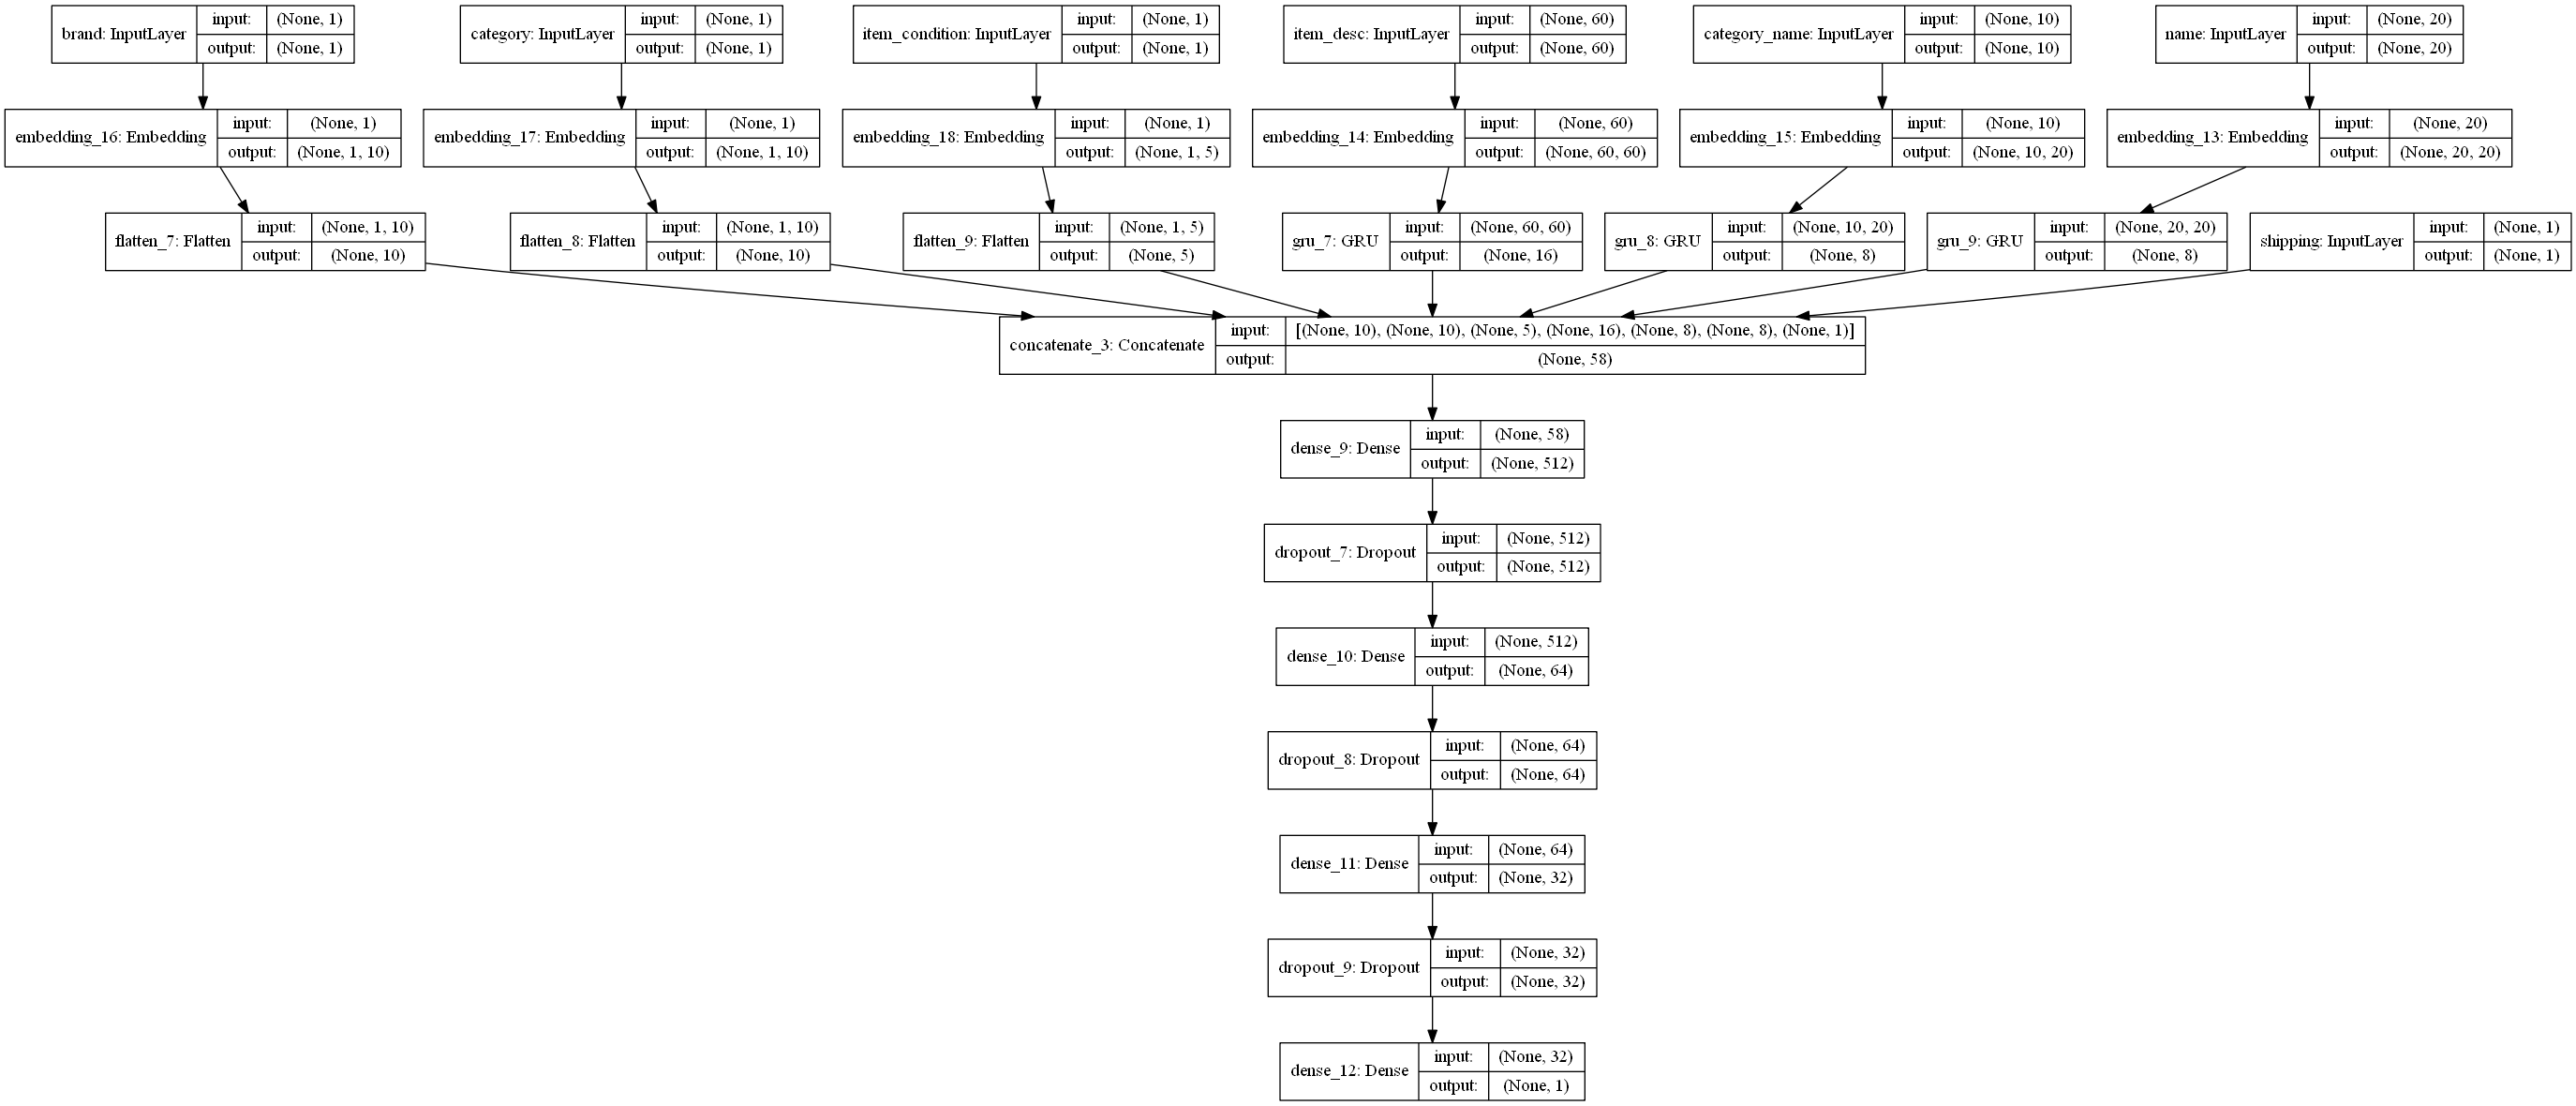

In [34]:
#KERAS MODEL DEFINITION
from keras.layers import Input, Dropout, Dense, \
    Activation, concatenate, GRU, Embedding, Flatten
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K
from keras import optimizers
from keras import initializers
from keras.utils import plot_model

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

# Root Mean Squared Logarithmic Error, Custom metric
def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

dr = 0.25

def get_model():
    #params
    dr_r = dr
    
    #Inputs
    name = Input(shape=[X_train["name"].shape[1]], name="name")
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")
    brand = Input(shape=[1], name="brand")
    category = Input(shape=[1], name="category")
    category_name = Input(shape=[X_train["category_name"].shape[1]], 
                          name="category_name")
    item_condition = Input(shape=[1], name="item_condition")
    shipping = Input(shape=[X_train["shipping"].shape[1]], name="shipping")
    
    #Embeddings layers
    emb_size = 60
    
    emb_name = Embedding(MAX_TEXT, emb_size//3)(name)
    emb_item_desc = Embedding(MAX_TEXT, emb_size)(item_desc)
    emb_category_name = Embedding(MAX_TEXT, emb_size//3)(category_name)
    emb_brand = Embedding(MAX_BRAND, 10)(brand)
    emb_category = Embedding(MAX_CATEGORY, 10)(category)
    emb_item_condition = Embedding(MAX_CONDITION, 5)(item_condition)
    
    rnn_layer1 = GRU(16) (emb_item_desc)
    rnn_layer2 = GRU(8) (emb_category_name)
    rnn_layer3 = GRU(8) (emb_name)
    
    #main layer
    main_l = concatenate([
        Flatten() (emb_brand)
        , Flatten() (emb_category)
        , Flatten() (emb_item_condition)
        , rnn_layer1
        , rnn_layer2
        , rnn_layer3
        , shipping
    ])
    main_l = Dropout(dr)(Dense(512,activation='relu') (main_l))
    main_l = Dropout(dr)(Dense(64,activation='relu') (main_l))
    main_l = Dropout(dr)(Dense(32,activation='relu') (main_l))
    
    #output
    output = Dense(1,activation="linear") (main_l)
    
    #model
    model = Model([name, item_desc, brand
                   , category, category_name
                   , item_condition, shipping], output)
    #optimizer = optimizers.RMSprop()
    optimizer = optimizers.Adam()
    model.compile(loss="mse", 
                  optimizer=optimizer)
    return model

def eval_model(model):
    val_preds = model.predict(X_valid)
    val_preds = np.expm1(val_preds)
    
    y_true = np.array(dvalid.price.values)
    y_pred = val_preds[:, 0]
    v_rmsle = rmsle(y_true, y_pred)
    print(" RMSLE error on dev test: "+str(v_rmsle))
    return v_rmsle
#fin_lr=init_lr * (1/(1+decay))**(steps-1)
exp_decay = lambda init, fin, steps: (init/fin)**(1/(steps-1)) - 1

    

gc.collect()

model = get_model()

plot_model(model, to_file='model4.png', show_shapes=True)
model.summary()
from IPython.display import Image
Image(filename='model4.png')

### Train model
Set learning rate and decay
- decay: float >= 0. Learning rate decay over each update.

In [26]:
#FITTING THE MODEL
epochs = 3
BATCH_SIZE = 512 * 3
steps = int(len(X_train['name'])/BATCH_SIZE) * epochs
lr_init, lr_fin = 0.013, 0.009
lr_decay = exp_decay(lr_init, lr_fin, steps)
log_subdir = '_'.join(['ep', str(epochs),
                    'bs', str(BATCH_SIZE),
                    'lrI', str(lr_init),
                    'lrF', str(lr_fin),
                    'dr', str(dr)])


model = get_model()

K.set_value(model.optimizer.lr, lr_init)
K.set_value(model.optimizer.decay, lr_decay)

history = model.fit(X_train, dtrain.target
                    , epochs=epochs
                    , batch_size=BATCH_SIZE
                    , validation_split=0.01
                    #, callbacks=[TensorBoard('./logs/'+log_subdir)]
                    #, verbose=10
                    )

Train on 1453031 samples, validate on 14678 samples
Epoch 1/3
1453031/1453031 [==============================] - 139s - loss: 0.4857 - val_loss: 0.2264
Epoch 2/3
1453031/1453031 [==============================] - 138s - loss: 0.2112 - val_loss: 0.2117
Epoch 3/3
1453031/1453031 [==============================] - 137s - loss: 0.1779 - val_loss: 0.1996


### Evaluate the model with validation datasets
calculate Root Mean Squared Logarithmic Error on the restored prices

In [27]:
v_rmsle = eval_model(model)

 RMSLE error on dev test: 0.44780704411885014


### Predict the test dataset

In [ ]:
#CREATE PREDICTIONS
preds = model.predict(X_test, batch_size=BATCH_SIZE)
preds = np.expm1(preds)

submission = test[["test_id"]][:test_len]
submission["price"] = preds[:test_len]

### Generate the submission file

In [87]:
submission.to_csv("./myNN"+log_subdir+"_{:.6}.csv".format(v_rmsle), index=False)

### Visualize the prices distributation

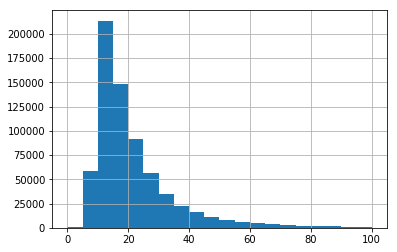

In [51]:
submission.price.hist(bins=20, range=[0, 100])